<a href="https://colab.research.google.com/github/wisrovi/03MAIR---Algoritmos-de-Optimizacion---2019/blob/master/AG2/WilliamSteveRodriguezVillamizar_AG2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# AG1- Actividad Guiada 2<br>
Nombre y Apellidos:   <br>
Colab: https://colab.research.google.com/github/wisrovi/03MAIR---Algoritmos-de-Optimizacion---2019/blob/master/AG2/WilliamSteveRodriguezVillamizar_AG2.ipynb<br>

Url:: https://github.com/wisrovi/03MAIR---Algoritmos-de-Optimizacion---2019/blob/master/AG2/WilliamSteveRodriguezVillamizar_AG2.ipynb<br>


In [0]:
#Decorador de Ricardo Lebron
from functools import wraps
from time import time

def calcular_tiempo(f):
    @wraps(f)
    def cronometro(*args, **kwargs):
        t_inicial = time() #tomo la hora antes de ejecutar la funcion
        salida = f(*args, **kwargs)
        t_final = time() #tomo la hora despues de ejecutar la funcion
        print('Tiempo transcurrido (en segundos): {}'.format(t_final - t_inicial))
        return salida
    return cronometro

In [0]:
TARIFAS = [
  [0,5,4,3,999,999,999],
  [999,0,999,2,3,999,11],
  [999,999, 0,1,999,4,10],
  [999,999,999, 0,5,6,9],
  [999,999, 999,999,0,999,4],
  [999,999, 999,999,999,0,3],
  [999,999,999,999,999,999,0]
]

In [0]:
#Programación dinámica
#C(i,j) = min {T(i,j) , C(i,k)+T(k,j) para todo i<k<=j } 
def PRECIOS(TARIFAS):
  N = len(TARIFAS[0])
  
  PRECIOS = [[9999]*N for i in [9999]*N]
  RUTA = [[""]*N for i in [""]*N]
  
  for i in range(N-1):
    for j in range(i+1, N):
      MIN = TARIFAS[i][j]
      RUTA[i][j] = i
      
      for k in range(i, j):
        if PRECIOS[i][k] + TARIFAS[k][j] < MIN:
          MIN = min(MIN, PRECIOS[j][k] + TARIFAS[k][j])
          RUTA[i][j] = k
      PRECIOS[i][j] = MIN
  return PRECIOS, RUTA

In [4]:
PRECIO, RUTA = PRECIOS(TARIFAS)
print(PRECIO)
print(RUTA)

[[9999, 5, 4, 3, 999, 999, 999], [9999, 9999, 999, 2, 3, 999, 11], [9999, 9999, 9999, 1, 999, 4, 10], [9999, 9999, 9999, 9999, 5, 6, 9], [9999, 9999, 9999, 9999, 9999, 999, 4], [9999, 9999, 9999, 9999, 9999, 9999, 3], [9999, 9999, 9999, 9999, 9999, 9999, 9999]]
[['', 0, 0, 0, 3, 3, 3], ['', '', 1, 1, 1, 3, 4], ['', '', '', 2, 3, 2, 5], ['', '', '', '', 3, 3, 3], ['', '', '', '', '', 4, 4], ['', '', '', '', '', '', 5], ['', '', '', '', '', '', '']]


In [0]:
def calcular_ruta(RUTA, desde, hasta):
  if desde == hasta:
    return desde
  else:
    return str(calcular_ruta(RUTA, desde, RUTA[desde][hasta])) + ' - ' + str(RUTA[desde][hasta])

In [6]:
calcular_ruta(RUTA,1,6)

'1 - 1 - 4'

Ramificación y Poda

In [0]:
COSTES = [[11,12,18,40], 
          [14,15,13,22],
          [11,17,19,23],
          [17,14,20,28]]  

In [8]:

def valor(S, COSTES):
  VALOR = 0
  for i in range(len (S)):
    VALOR += COSTES[S[i]][i]
  return VALOR


valor((0,1,2,3), COSTES)

73

In [9]:
import itertools
todas_posibilidades = list(itertools.permutations([0,1,2,3]))
todas_posibilidades = list(itertools.permutations(range(len(COSTES))))
print(todas_posibilidades)

[(0, 1, 2, 3), (0, 1, 3, 2), (0, 2, 1, 3), (0, 2, 3, 1), (0, 3, 1, 2), (0, 3, 2, 1), (1, 0, 2, 3), (1, 0, 3, 2), (1, 2, 0, 3), (1, 2, 3, 0), (1, 3, 0, 2), (1, 3, 2, 0), (2, 0, 1, 3), (2, 0, 3, 1), (2, 1, 0, 3), (2, 1, 3, 0), (2, 3, 0, 1), (2, 3, 1, 0), (3, 0, 1, 2), (3, 0, 2, 1), (3, 1, 0, 2), (3, 1, 2, 0), (3, 2, 0, 1), (3, 2, 1, 0)]


In [0]:
#Fuerza bruta

@calcular_tiempo
def Fuerza_bruta(COSTES):
  mejor_valor = 10e10
  mejor_solucion = ()
  
  for s in list(itertools.permutations(range(len(COSTES)))):
    valor_tmp = valor(s, COSTES)
    if valor_tmp < mejor_valor:
      mejor_valor = valor_tmp
      mejor_solucion = s
  print("La mejor solución es: ", mejor_solucion, " con valor: ", mejor_valor)
    


In [11]:
Fuerza_bruta(COSTES)

La mejor solución es:  (0, 3, 1, 2)  con valor:  61
Tiempo transcurrido (en segundos): 0.0019788742065429688


In [0]:
#coste inferior solución parcial
def CI(S, COSTES):
  VALOR = 0
  #valores establecidos
  for i in range(len(S)):
    VALOR += COSTES[i][S[i]]
  
  #Estimación
  for i in range(len(COSTES)):
    if i not in S:
      VALOR += min([COSTES[j][i] for j in range(len(S), len(COSTES))])
      
  return VALOR

In [13]:
CI((1,2), COSTES)

59

In [0]:
#(0,2) -> (0,2,1),(0,2,3)
#Funcion para ramificar
def crear_hijos(NODO, N):
  HIJOS = []
  for i in range(N):
    if i not in NODO:
      HIJOS.append({'s':NODO+(i,)})
  return HIJOS

In [15]:
crear_hijos((0,2),4)

[{'s': (0, 2, 1)}, {'s': (0, 2, 3)}]

In [0]:
#Ramificación y poda

@calcular_tiempo
def ramificacion_y_poda(COSTES):
  DIMENSION = len(COSTES)
  MEJOR_SOLUCION = tuple(i for i in range(len(COSTES)))
  CotaSup = valor(MEJOR_SOLUCION, COSTES)
  
  NODOS = []
  NODOS.append({'s':(),'ci':CI((), COSTES)})
  iteracion = 0
  
  while(len(NODOS)>0):
    iteracion += 1
    
    nodo_prometedor = min(NODOS, key=lambda x:x['ci'])
    
    #ramificacion
    HIJOS = [ {'s':x['s'], 'ci':CI(x['s'], COSTES) } for x in crear_hijos(nodo_prometedor['s'], DIMENSION)   ]
    
    #revisamos la cota superior y nos quedamos con la mejor solucion, si se haya unas solucion final
    NODO_FINAL = [x for x in HIJOS if len(x['s']) == DIMENSION]
    if len(NODO_FINAL) >0:
      if NODO_FINAL[0]['ci'] < CotaSup:
        CotaSup = NODO_FINAL[0]['ci']
        MEJOR_SOLUCION = NODO_FINAL[0]
        
    #poda
    HIJOS = [x for x in HIJOS if x['ci'] < CotaSup]
    
    #eliminamos el nodo ramificado
    NODOS = [x for x in NODOS if x['s'] != nodo_prometedor['s']]
    
    #añadimos los hijos
    NODOS.extend(HIJOS)
    
    
  print("La solución final es: ",MEJOR_SOLUCION , " en ", iteracion, " iteraciones ", "para dimensión: ", DIMENSION )

In [17]:
ramificacion_y_poda(COSTES)

La solución final es:  {'s': (0, 2, 3, 1), 'ci': 61}  en  14  iteraciones  para dimensión:  4
Tiempo transcurrido (en segundos): 0.0016105175018310547


Descenso de gradiente

In [0]:
#descenso de gradiente
import math
import matplotlib.pyplot as plt
import numpy as np

import random

In [0]:
#Aproximamos el valor del gradiente en un punto por su definición
def df(PUNTO):
    h = 0.01
    T = np.copy(PUNTO)
    grad = np.zeros(2)
    for it, th in enumerate(PUNTO):
        T[it] = T[it] + h
        grad[it] = (f(T) - f(PUNTO)) / h
    return grad
  
def graficarGradiente_funcion(f, df = None):
  if df == None:
    df = lambda X: [2*X[0], 2*X[1]] #Gradiente

  #prepara los datos para dibujar mapa de niveles de Z
  resolucion = 100
  rango = 2.5
  X = np.linspace(-rango, rango, resolucion)
  Y = np.linspace(-rango, rango, resolucion)
  Z = np.zeros((resolucion, resolucion))
  for ix, x in enumerate(X):
    for iy, y in enumerate(Y):
      Z[iy, ix] = f([x,y])

  #pinta el mapa de niveles de z
  plt.contourf(X,Y,Z, resolucion)
  plt.colorbar()

  #generamos punto aleatorio
  P=[random.uniform(-2,2), random.uniform(-2,2)]
  plt.plot(P[0], P[1], "o", c="white")

  #tasa de aprendizaje
  TA = 0.1

  #iteraciones
  for _ in range(500):
    grad = df(P)
    #print(P.grad)
    P[0],P[1] = P[0] - TA*grad[0] , P[1] - TA*grad[1]
    plt.plot(P[0],P[1], "o",c="red")

  plt.plot(P[0], P[1],"o",c="green")  
  plt.show()
  print("Solucion:", P, f(P))
  return 

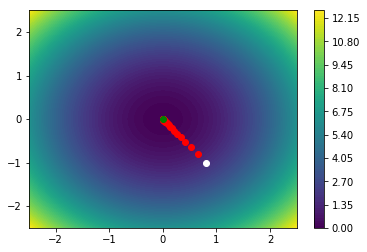

Solucion: [2.8366778393775595e-49, -3.570041127205081e-49] 2.0791934814351465e-97


In [20]:
f = lambda X: X[0]**2 + X[1]**2 #Funcion
punto = graficarGradiente_funcion(f)

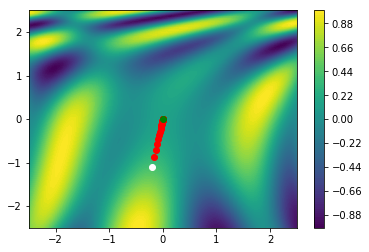

Solucion: [-7.279956262792965e-50, -3.851547417210284e-49] 0.1411200080598672


In [21]:
#Definimos la funcion
#sin(1/2 * x^2 - 1/4 * y^2 + 3) * cos(2*x + 1 - E^y)
f = lambda X: np.sin(1/2 * X[0]**2 - 1/4 * X[1]**2 + 3) * np.cos(2 * X[0] + 1 - np.e**X[1])
punto = graficarGradiente_funcion(f)